# Recopilación de datos (web scraping)






---

# ¿Cómo funciona?

Consiste en atacar una página web con peticiones GET del protocolo HTTP para obtener su contenido en forma de texto HTML, jerárquico y fácilmente navegable (si está bien estructurado), que hace posible acceder a la información deseada.

![http](https://miro.medium.com/v2/resize:fit:700/1*sWRQuM916mYWgBxxATwO7Q.png)

# Un poco de HTML


En HTML, la información está contenida en etiquetas, que indican una categoría, un propósito o estructura específica de los elementos dentro de una página web.

Estas etiquetas permiten organizar y presentar el contenido de manera jerárquica y semántica. Al realizar web scraping, normalmente se busca seleccionar etiquetas en base a estas categorías para extraer la información deseada de una página web.

![html](https://miro.medium.com/v2/resize:fit:700/1*EWK_-k3MKFxgGozPeHKYAg.png)
![tags](https://miro.medium.com/v2/resize:fit:700/1*pyKQo-6zPlR0-t29gYIFuA.png)

# Ejemplo rápido


Supongamos este bloque de código HTML:


```
<html>
    <head>
        <title>Mi tíutlo</title>
    </head>
    <body>
        <h1>Encabezado</h1>
        <ul id="lista" class="miLista">
            <li>Punto 1</li>
            <li>Punto 2</li>
            <li>Punto 3</li>
        </ul>
    </body>
</html>
```


Normalmente, se puede optar por una de estas dos herramientas para navegar un árbol HTML:
- Un parser (como BeautifulSoup)
- Expresiones regulares


Cada una tiene distintas ventajas e inconvenienes. BeautifulSoup encapsula un parser de HTML con comandos sencillos, mientras que el *parsing* por expresiones regulares resulta más eficiente en ejecución, pero algo más tedioso de implementar.

Empezaremos con BeautifulSoup.

## BeautifulSoup
![import.png](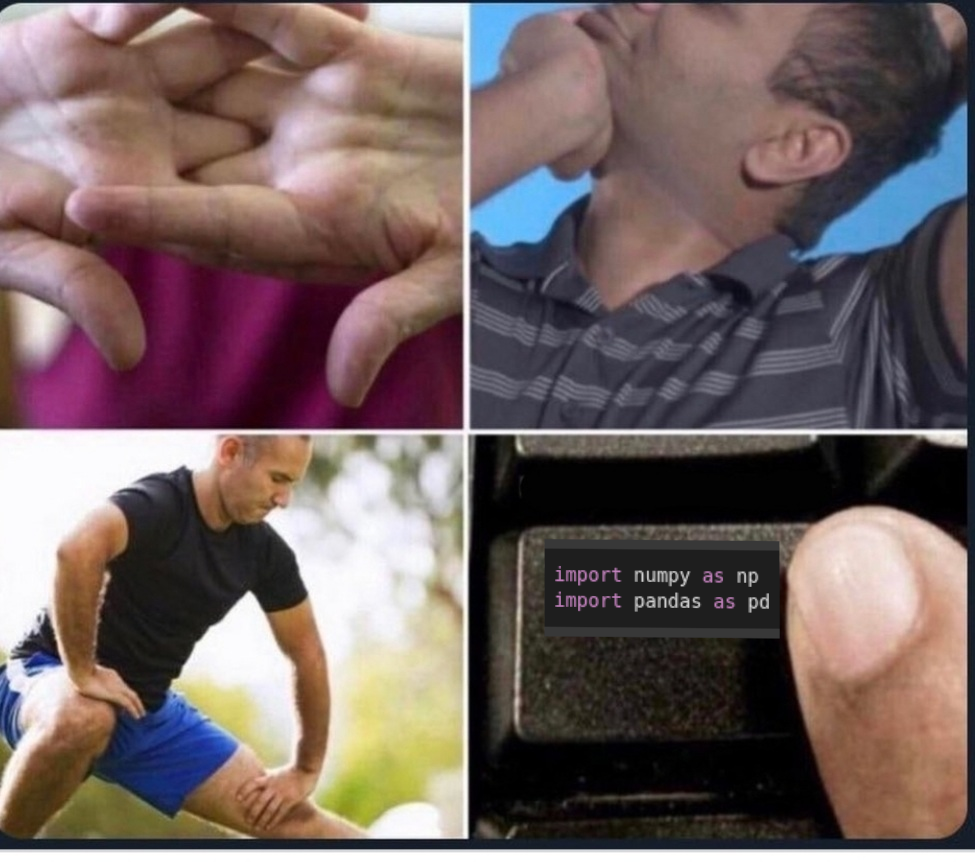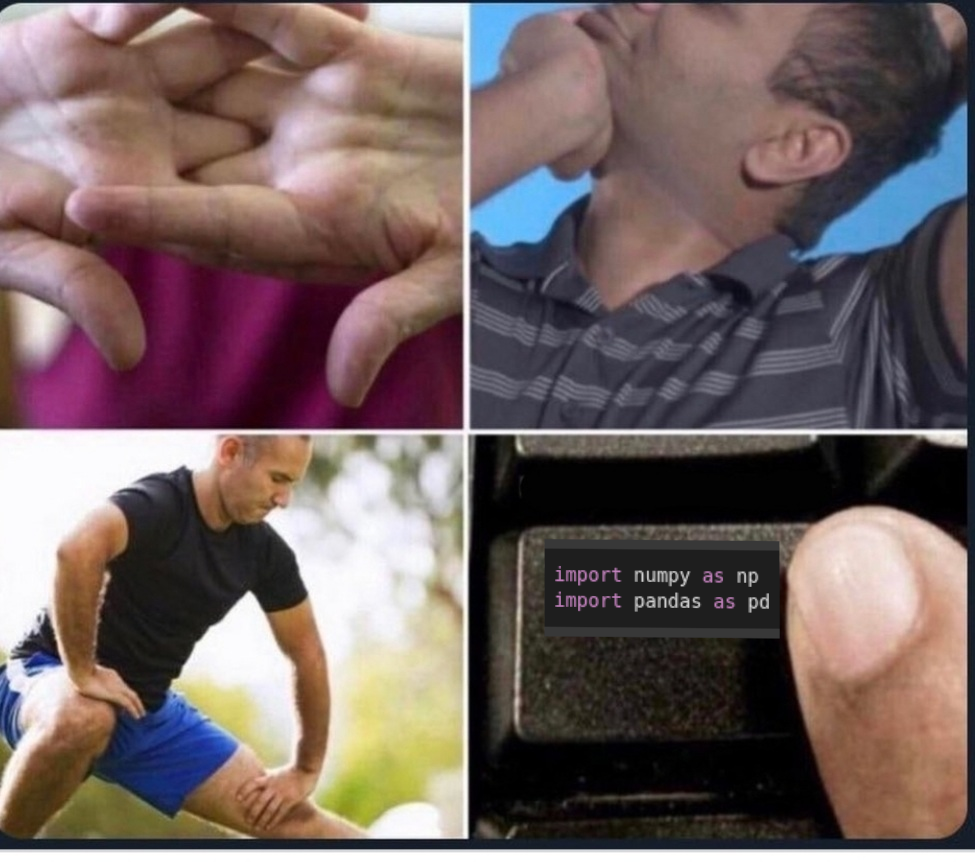)

En primer lugar, instalaremos la librería

In [157]:
!pip install bs4

In [158]:
html_str = """
<html>
    <head>
        <title>Mi título</title>
    </head>
    <body>
        <h1>Encabezado</h1>
        <ul id="lista" class="miLista">
            <li>Punto 1</li>
            <li>Punto 2</li>
            <li>Punto 3</li>
        </ul>
    </body>
</html>
"""

In [159]:
from IPython.core.display import display, HTML
display(HTML(html_str))

Una vez obtenido el texto (en ejemplos posteriores veremos cómo se obtiene con peticiones), es necesario pasar esta información a BeautifulSoup para que genere el árbol HTML:

![tree](https://miro.medium.com/v2/resize:fit:700/1*Yk_3bpbQsTPTSBXQYY7n5w.png)

In [160]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_str, 'html.parser')

BeautifulSoup ofrece dos funciones ampliamente utilizadas, `find` y `find_all`:


![find](https://miro.medium.com/v2/resize:fit:700/1*f4hCn74jwDGrhoPgjhRzbg.png)

La función `find` devuelve solo la primera ocurrencia de la consulta de búsqueda, mientras que `find_all` devuelve una lista de todas las coincidencias.

Digamos que estamos buscando todos los encabezados `<h1>` en el código.

In [161]:
header = soup.find('h1')

Los elementos encontrados se almacenan en formato [bs4.element.Tag](https://beautiful-soup-4.readthedocs.io/en/latest/index.html?highlight=tag#tag)

In [162]:
print(type(header))

<class 'bs4.element.Tag'>


La parte más interesante de estas etiquetas, normalmente, es el texto que contienen:

In [163]:
print(header.text)
print("f[+] Tipo: {type(header)}")

Encabezado
f[+] Tipo: {type(header)}


Así es como se obtienen los strings, más tratables.

Veamos un ejemplo para encontrar todas las ocurrencias de un tipo de etiqueta con `find_all`:

In [164]:
soup.find_all('li')

[<li>Punto 1</li>, <li>Punto 2</li>, <li>Punto 3</li>]

Devuelve un array de `bs4.element.Tag`. Pasémoslo a texto:

In [165]:
inner_text = [item.text for item in soup.find_all('li')]

inner_text

['Punto 1', 'Punto 2', 'Punto 3']

## Expresiones regulares (regex)

Recomendamos consultar esta [cheatsheet](https://www.pythoncheatsheet.org/cheatsheet/regular-expressions) para construir expresiones regulares.

Seguiremos el mismo ejemplo que en el caso anterior, empecemos extrayendo el primer encabezado (`h1`):

In [166]:
import re

pattern = r'<h1>(.*?)</h1>'

Analicemos la expresión regular ```'<h1>(.*?)</h1>'```
- `r` indica que se tratará la cadena como 'raw', es decir, procesando sólo lo que coincida con la expresión
- `(.*?)` coincide con cualquier carácter `.` cero o más veces `*`, de manera 'non-greedy' `?`. Esto significa que coincidirá con las cadenas más cortas posibles en caso de ambigüedad.

Entonces, expresión regular nos devolverá todos los caracteres que encuentre entre etiquetas `h1`. Esto equivale a obtener el texto de una etiqueta obtenida por el método `find` de *BeautifulSoup*. Pongámoslo a prueba::

In [167]:
result = re.search(pattern, html_str)

if result:
    first_h1_content = result.group(1)
    print("[+] Contenido del primer h1:", first_h1_content)
else:
    print("[+] No se encontró ningún h1 en el HTML.")

[+] Contenido del primer h1: Encabezado


El método `search` devuelve la primera coincidencia. Probemos a replicar el ejemplo de los elementos de la lista valiéndonos del método `findall` de regex (no confundir con `find_all` de BeautifulSoup)

In [168]:
pattern_li = r'<li>(.*?)</li>'

In [169]:
matches = re.findall(pattern_li, html_str)

if matches:
    print("[+] Contenidos de las etiquetas <li> encontradas:")
    for match in matches:
        print(match)
else:
    print("[+] No se encontraron etiquetas <li> en el HTML.")

[+] Contenidos de las etiquetas <li> encontradas:
Punto 1
Punto 2
Punto 3


## Conclusiones de la comparación

**BeautifulSoup**
- Velocidad dependiente del parser
- Legible y mantenible
- No necesita que el HTML sea estable porque construye el árbol cada vez

**Regex**
- Muy rápido en muchos casos
- Complicado de escribir y mantener
- Requiere que el HTML sea estable

## Un ejemplo de mayor magnitud

Vamos a realizar un análisis de la [producción de vehículos a motor por países](https://en.wikipedia.org/wiki/List_of_countries_by_motor_vehicle_production) a través de los datos disponibles en Wikipedia.

![asd](https://i.imgur.com/7vOpOYk.png)

In [170]:
import numpy as np
import pandas as pd

Obtenemos el texto de la página

In [171]:
import requests

url = "https://en.wikipedia.org/wiki/List_of_countries_by_motor_vehicle_production"
page = requests.get(url).text

page

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of countries by motor vehicle production - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-fea

Un poco ilegible... Vamos a parsearlo y a buscar la tabla que queremos:

In [172]:
table = soup.find('table')

table

Esto no se parece mucho a lo que salía en la web... Parece que la que buscamos no es la primera del HTML, tenemos que intentar distinguirla de las demás de alguna forma, por ejemplo, con la clase (`class_`, porque `class` es una palabra reservada de Python):

In [173]:
soup = BeautifulSoup(page)
table = soup.find('table', class_='wikitable')

table

<table class="wikitable sortable" style="text-align: right;">
<tbody><tr style="background:#ececec;">
<th data-sort-type="number">#</th>
<th><span class="nowrap">Country/area</span>
</th>
<th>2023
</th>
<th>2022
</th>
<th>2021<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
</th>
<th>2020<sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup>
</th>
<th>2019<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[5]</a></sup>
</th>
<th data-sort-type="number">2018<br/><sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[6]</a></sup>
</th>
<th data-sort-type="number">2017<sup class="reference" id="cite_ref-:0_7-0"><a href="#cite_note-:0-7">[7]</a></sup>
</th>
<th data-sort-type="number">2016<br/><sup class="reference" id="cite_ref-8"><a href="#cite_note-8">[8]</a></sup>
</th>
<th data-sort-type="number">2015<br/><sup class="reference" id="cite_ref-9"><a href="#cite_note-9">[9]</a></sup></th>
<th data-sort-type="number">2014<b

Algo mejor, pero aún podría ser más legible. Vamos a traspasar los datos a un DataFrame de pandas para poder procesarlos:

In [174]:
import re

column_names = []
pattern = r'^(.*?)\['         # regex para cargarme los corchetes feos

first_row = table.find('tr')    # primera fila que quiero limpiar

for i in first_row.find_all('th'):
    text = i.text.strip()                 # eliminamos blanks

    clean_text = text if len(text) > 1 else None        # a veces hay alguna vacia no se por que

    if clean_text is not None:
        corchete_text = re.search(pattern, clean_text)

        if corchete_text:
            texto_hasta_corchete = corchete_text.group(1)
            column_names.append(texto_hasta_corchete.strip())
        else:
            column_names.append(clean_text)

column_names


['Country/area',
 '2023',
 '2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2005',
 '2000',
 '1995',
 '1990',
 '1980',
 '1970',
 '1960',
 '1950',
 'Peakproduction',
 'Peakyear']

In [175]:
data = []

# Obtener todas las filas de la tabla
rows = table.find_all('tr')


for row in rows:
    # celdas de la fila (menos la primera, que es el indice)
    cells = row.find_all('td')[1:]
    # Extraer el texto de cada celda y añadirlo a la lista de datos
    data.append([cell.get_text(strip=True) for cell in cells])

# Crear un DataFrame de Pandas con los datos
df = pd.DataFrame(data, columns=column_names)


In [176]:
df

,Country/area,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2005,2000,1995,1990,1980,1970,1960,1950,Peakproduction,Peakyear
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,World,,"85,016,728","80,145,988","77,621,582","91,786,861","95,634,593","97,302,534","95,057,929","90,780,583",...,"66,482,439","58,374,162","50,046,000","48,553,969","38,564,516","29,419,484","16,488,340","10,577,426","97,302,534",2017
2,China,"30,160,000","27,020,615[25]","26,082,220","25,225,242","25,720,665","27,809,196","29,015,434","28,118,794","24,503,326",...,"5,717,619","2,069,069","1,434,772","509,242","222,288","87,166","22,574",?,"30,160,000",2023
3,United States,,"10,060,339","9,167,214","8,822,399","10,880,019","11,314,705","11,189,985","12,198,137","12,100,095",...,"11,946,653","12,799,857","11,985,457","9,782,997","8,009,841","8,283,949","7,905,119","8,005,859","13,024,978[26]",1999[27]
4,Japan,,"7,835,519","7,846,955","8,067,557","9,684,298","9,728,528","9,693,746","9,204,590","9,278,321",...,"10,799,659","10,140,796","10,195,536","13,486,796","11,042,884","5,289,157","481,551","31,597","13,486,796",1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Note 2.Former countries,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
67,Soviet Union,,,,,—,—,—,—,—,...,—,—,"2,039,600","2,199,200","916,118","523,591","362,985","2,247,500",1985,None
68,Czechoslovakia,,,,,—,—,—,—,—,...,—,—,"242,000","233,112","169,920","75,000","31,000","242,000",1990,None
69,Yugoslavia,,,,,—,—,—,—,—,...,—,—,"239,000[18][41]","278,000","124,000","16,000","1,000","318,300",1988,None


Mejor, pero un poco sucio, vamos a echar un vistazo a ver qué tenemos aquí. Lo primero que llama la atención son las celdas vacías que no tienen `None`. Tendremos que sustituir las celdas de las que no hay información por ceros para poder tratar los datos posteriormente.

In [177]:
print(df['2023'][68])
print(len(df['2023'][68]))
print(type(df['2023'][68]))


0
<class 'str'>


Se ve que son strings de longitud 0. Echemos un ojo a los guiones `—`:

In [178]:
print(df['2019'][68])
print(len(df['2019'][68]))
print(type(df['2019'][68]))

—
1
<class 'str'>


Pero parece que nuestro mayor problema está en los números, ya que:
- Llevan una coma
- Algunos numeros traen corchetes

In [179]:
print(df['1995'][69])
print(len(df['1995'][69]))
print(type(df['1995'][69]))

239,000[18][41]
15
<class 'str'>


Realmente hay dos formas de solucionarlo
- encargarse de ello mientras extraemos los datos
- limpiar a posteriori

**Ejercicio de debate para clase**
¿Cuál dirías que es mejor y en qué caso?

In [180]:
data = []

# filas de la tabla
rows = table.find_all('tr')

for row in rows[1:]:
    cells = row.find_all('td')[1:]  # ignorar indices

    row_data = []
    for cell in cells:
        text = cell.get_text(strip=True)

        # nos cargamos lo que haya a la derecha del primer corchete, incluido
        if '[' in text:
            text = re.sub(r'\[.*?$', '', text)

        # eliminar comas
        number = re.sub(r'(?<=\d),(?=\d)', '', text)

        row_data.append(number)

    data.append(row_data)

df = pd.DataFrame(data, columns=column_names)  # Ignorar el nombre de la primera columna

In [181]:
df

,Country/area,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2005,2000,1995,1990,1980,1970,1960,1950,Peakproduction,Peakyear
0,World,,85016728,80145988,77621582,91786861,95634593,97302534,95057929,90780583,...,66482439,58374162,50046000,48553969,38564516,29419484,16488340,10577426,97302534,2017
1,China,30160000,27020615,26082220,25225242,25720665,27809196,29015434,28118794,24503326,...,5717619,2069069,1434772,509242,222288,87166,22574,?,30160000,2023
2,United States,,10060339,9167214,8822399,10880019,11314705,11189985,12198137,12100095,...,11946653,12799857,11985457,9782997,8009841,8283949,7905119,8005859,13024978,1999
3,Japan,,7835519,7846955,8067557,9684298,9728528,9693746,9204590,9278321,...,10799659,10140796,10195536,13486796,11042884,5289157,481551,31597,13486796,1990
4,India,,5456857,4399112,3490000,4516017,5174645,4782896,4519341,4160585,...,1638674,801360,636000,362655,113917,76409,51136,14688,5456857,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Note 2.Former countries,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
66,Soviet Union,,,,,—,—,—,—,—,...,—,—,2039600,2199200,916118,523591,362985,2247500,1985,None
67,Czechoslovakia,,,,,—,—,—,—,—,...,—,—,242000,233112,169920,75000,31000,242000,1990,None
68,Yugoslavia,,,,,—,—,—,—,—,...,—,—,239000,278000,124000,16000,1000,318300,1988,None


Mucho mejor, ahora encarguémonos de los strings:

In [182]:
for column in df.columns:
    # nos cargamos con un estiloso oneliner los strings de longitud menor igual a 2
    df[column] = df[column].apply(lambda x: None if isinstance(x, str) and len(x.strip()) <= 2 else x)


In [183]:
df

,Country/area,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2005,2000,1995,1990,1980,1970,1960,1950,Peakproduction,Peakyear
0,World,None,85016728,80145988,77621582,91786861,95634593,97302534,95057929,90780583,...,66482439,58374162,50046000,48553969,38564516,29419484,16488340,10577426,97302534,2017
1,China,30160000,27020615,26082220,25225242,25720665,27809196,29015434,28118794,24503326,...,5717619,2069069,1434772,509242,222288,87166,22574,None,30160000,2023
2,United States,None,10060339,9167214,8822399,10880019,11314705,11189985,12198137,12100095,...,11946653,12799857,11985457,9782997,8009841,8283949,7905119,8005859,13024978,1999
3,Japan,None,7835519,7846955,8067557,9684298,9728528,9693746,9204590,9278321,...,10799659,10140796,10195536,13486796,11042884,5289157,481551,31597,13486796,1990
4,India,None,5456857,4399112,3490000,4516017,5174645,4782896,4519341,4160585,...,1638674,801360,636000,362655,113917,76409,51136,14688,5456857,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Note 2.Former countries,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
66,Soviet Union,None,None,None,None,None,None,None,None,None,...,None,None,2039600,2199200,916118,523591,362985,2247500,1985,None
67,Czechoslovakia,None,None,None,None,None,None,None,None,None,...,None,None,242000,233112,169920,75000,31000,242000,1990,None
68,Yugoslavia,None,None,None,None,None,None,None,None,None,...,None,None,239000,278000,124000,16000,1000,318300,1988,None


Ahora rellenamos de golpe todos los nulos y nos aseguramos de que sean de tipo int para poder tratarlos y hacer gráficos:

In [184]:
# rellenamos los nulos
df.fillna(0, inplace=True)

# casteamos a lo bestia
for column in df.columns[1:]:
    df[column] = df[column].astype(int)

df

,Country/area,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2005,2000,1995,1990,1980,1970,1960,1950,Peakproduction,Peakyear
0,World,0,85016728,80145988,77621582,91786861,95634593,97302534,95057929,90780583,...,66482439,58374162,50046000,48553969,38564516,29419484,16488340,10577426,97302534,2017
1,China,30160000,27020615,26082220,25225242,25720665,27809196,29015434,28118794,24503326,...,5717619,2069069,1434772,509242,222288,87166,22574,0,30160000,2023
2,United States,0,10060339,9167214,8822399,10880019,11314705,11189985,12198137,12100095,...,11946653,12799857,11985457,9782997,8009841,8283949,7905119,8005859,13024978,1999
3,Japan,0,7835519,7846955,8067557,9684298,9728528,9693746,9204590,9278321,...,10799659,10140796,10195536,13486796,11042884,5289157,481551,31597,13486796,1990
4,India,0,5456857,4399112,3490000,4516017,5174645,4782896,4519341,4160585,...,1638674,801360,636000,362655,113917,76409,51136,14688,5456857,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Note 2.Former countries,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,Soviet Union,0,0,0,0,0,0,0,0,0,...,0,0,2039600,2199200,916118,523591,362985,2247500,1985,0
67,Czechoslovakia,0,0,0,0,0,0,0,0,0,...,0,0,242000,233112,169920,75000,31000,242000,1990,0
68,Yugoslavia,0,0,0,0,0,0,0,0,0,...,0,0,239000,278000,124000,16000,1000,318300,1988,0


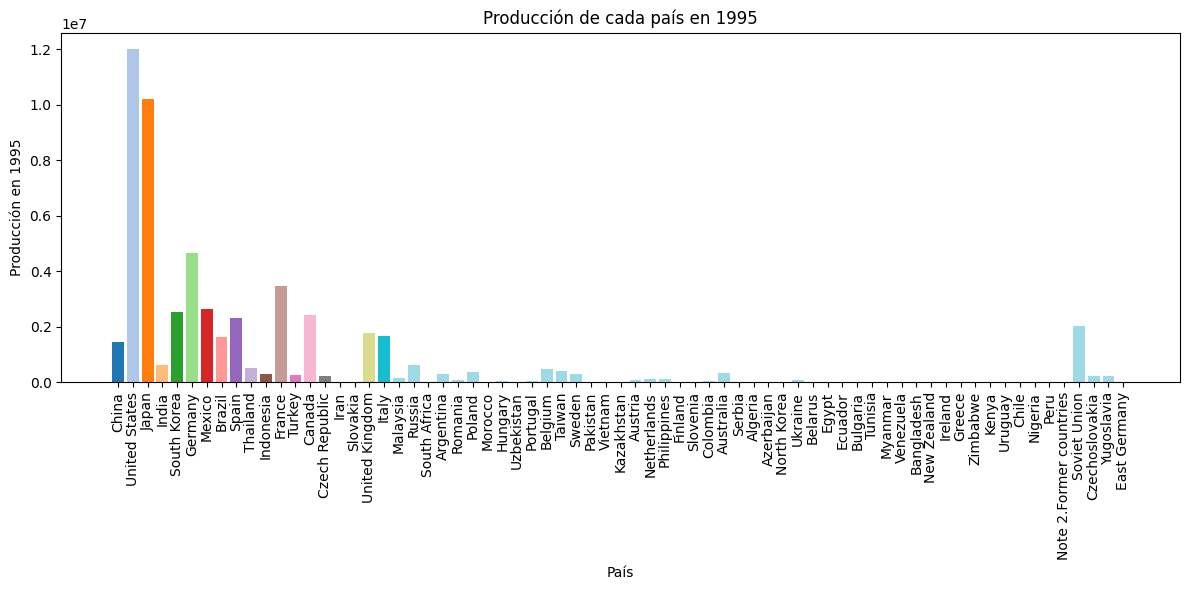

In [206]:
import matplotlib.pyplot as plt

YEAR = '1995'

# excluimos la producción mundial
top_10_countries = df[df['Country/area'] != 'World'].nlargest(10, YEAR)     # sin ordenar para que se aprecie cuándo no tenemos info de los mismos
                                                                            # para que quede más bonito podemos usar sort_values
# datos para el gráfico de barras
countries = data_to_plot['Country/area']
production_year = data_to_plot[YEAR]

# colores únicos para cada país
colors = plt.cm.tab20(range(len(countries)))

# configuración del lienzo
plt.figure(figsize=(12, 6))                                                 # tamaño
plt.bar(countries, production_year, color=colors)                           # barras del gráfico de barras (qué valores forman las barras)
plt.xticks(rotation=90)                                                     # etiquetas en vertical (90º) para el eje X (así no se solapan)
plt.xlabel('País')                                                          # etiqueta del eje X
plt.ylabel(f'Producción en {YEAR}')                                         # etiqueta del eje Y
plt.title(f'Producción de cada país en {YEAR}')                             # título del gráfico
plt.tight_layout()                                                          # ajuste automático para que nada se superponga, útil cuando hay muchas barras
plt.show()                                                                  # por último, mostrar el gráfico

Por legibilidad, vamos a excluir todo menos el top 10:

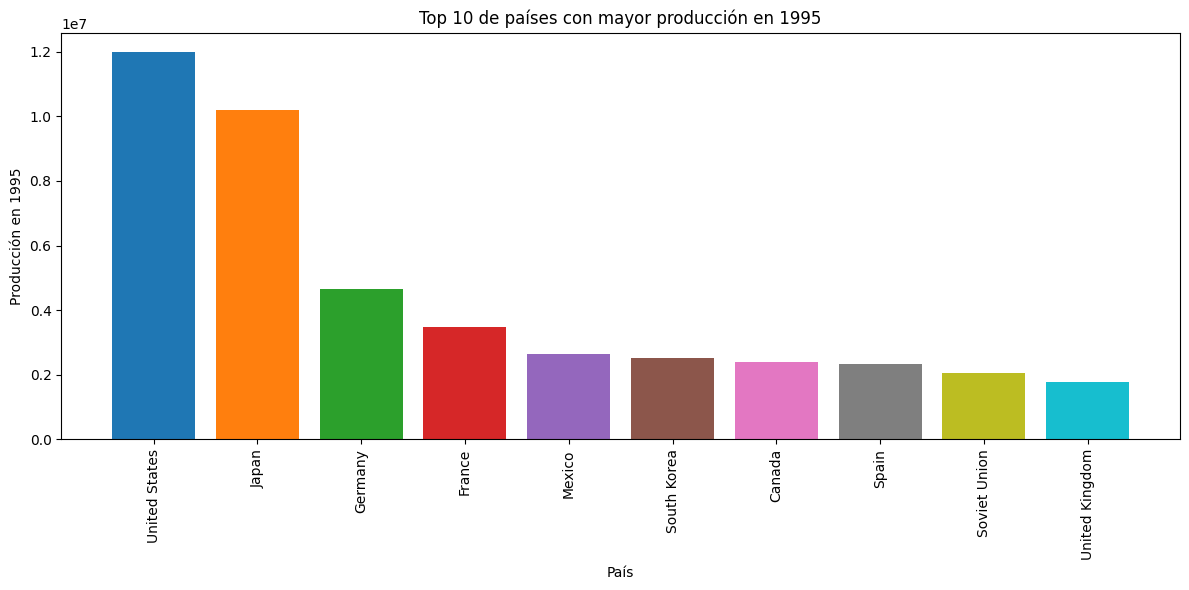

In [208]:
import matplotlib.pyplot as plt

# filtrado del top 10 países, esta vez ordenados
top_10_countries = df[df['Country/area'] != 'World'].nlargest(10, YEAR).sort_values(by=YEAR, ascending=False)

# datos para el gráfico de barras
countries = top_10_countries['Country/area']
production_year = top_10_countries[YEAR]

# colores únicos para cada país
colors = plt.cm.tab10(range(len(countries)))

# configuración del lienzo
plt.figure(figsize=(12, 6))
plt.bar(countries, production_year, color=colors)
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel(f'Producción en {YEAR}')
plt.title(f'Top 10 de países con mayor producción en {YEAR}')
plt.tight_layout()
plt.show()